# ADA Project Group 8



## DATA ANALYSIS


In [ ]:
! pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=3236f3a64cdc6b7b9b0539ba9f77bf769457523724c1d1dedb10b1b13ec99027
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import pandas as pd
import math
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
import yfinance as yf 
AAPL=yf.download("AAPL", start="2002-01-01", end="2020-03-11",group_by="ticker")
MAST=yf.download("MA", start="2002-01-01", end="2020-03-11",group_by="ticker")
FORD=yf.download("F", start="2002-01-01", end="2020-03-11",group_by="ticker")
EXON=yf.download("XOM", start="2002-01-01", end="2020-03-11",group_by="ticker")
AAPL.dropna(axis=0,inplace=True)
MAST.dropna(axis=0,inplace=True)
FORD.dropna(axis=0,inplace=True)
EXON.dropna(axis=0,inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL.to_csv('AAPL.csv')
MAST.to_csv('MAST.csv')
FORD.to_csv('FORD.csv')
EXON.to_csv('EXON.csv')

In [ ]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-04,296.440002,303.399994,293.130005,302.739990,302.739990,54794600
2020-03-05,295.519989,299.549988,291.410004,292.920013,292.920013,46893200
2020-03-06,282.000000,290.820007,281.230011,289.029999,289.029999,56544200
2020-03-09,263.750000,278.089996,263.000000,266.170013,266.170013,71686200
2020-03-10,277.140015,286.440002,269.369995,285.339996,285.339996,71322500


In [ ]:
MAST.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-04,299.109985,302.799988,292.750000,302.359985,302.359985,6463800
2020-03-05,295.709991,298.709991,288.239990,290.730011,290.730011,6621300
2020-03-06,282.690002,288.850006,278.619995,287.010010,287.010010,7061500
2020-03-09,265.000000,279.239990,261.179993,262.010010,262.010010,8498300
2020-03-10,276.420013,280.869995,262.859985,280.570007,280.570007,8131400


In [ ]:
FORD.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-04,7.09,7.09,6.92,7.08,7.08,70588100
2020-03-05,6.96,6.97,6.71,6.74,6.74,78070900
2020-03-06,6.60,6.68,6.40,6.49,6.49,109932200
2020-03-09,5.97,6.14,5.87,5.90,5.90,103901700
2020-03-10,6.26,6.29,5.80,6.26,6.26,101873600


In [ ]:
EXON.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-04,52.230000,52.480000,51.119999,52.419998,52.419998,24079600
2020-03-05,50.419998,50.700001,49.040001,50.110001,50.110001,40788200
2020-03-06,48.840000,49.009998,47.200001,47.689999,47.689999,55640500
2020-03-09,41.709999,44.570000,40.799999,41.860001,41.860001,72896300
2020-03-10,46.169998,46.259998,41.450001,43.410000,43.410000,60445900


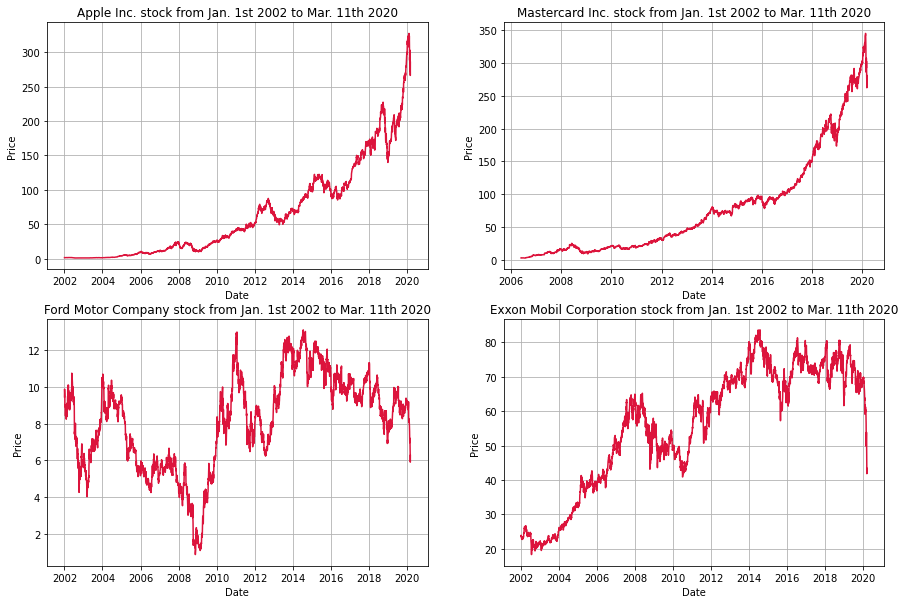

In [ ]:
fig = plt.figure(figsize=[15,10])
ax1=fig.add_subplot(2, 2, 1)
ax1.title.set_text('Apple Inc. stock from Jan. 1st 2002 to Mar. 11th 2020')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.plot(AAPL['Adj Close'],color='#DC143C')
ax2=fig.add_subplot(2, 2, 2)
ax2.title.set_text('Mastercard Inc. stock from Jan. 1st 2002 to Mar. 11th 2020')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.plot(MAST['Adj Close'],color='#DC143C')
ax2.grid(True)
ax3=fig.add_subplot(2, 2, 3)
ax3.title.set_text('Ford Motor Company stock from Jan. 1st 2002 to Mar. 11th 2020')
ax3.set_xlabel('Date')
ax3.set_ylabel('Price')
ax3.plot(FORD['Adj Close'],color='#DC143C')
ax3.grid(True)
ax4=fig.add_subplot(2, 2, 4)
ax4.title.set_text('Exxon Mobil Corporation stock from Jan. 1st 2002 to Mar. 11th 2020')
ax4.set_xlabel('Date')
ax4.set_ylabel('Price')
ax4.plot(EXON['Adj Close'],color='#DC143C')
ax4.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

It is usual to use daily changes of the prices instead of the absolute value of the stock, so I plot the daily log return on each stock.

***I calculate daily returns from***

$$u_i=log(\frac{S_i}{S_{i-1}})$$

***to obtain daily returns.***

I will add a column to my data (logReturn) for the results (The first row of data is also removed). 

In [ ]:
AAPL['Return']=np.log(AAPL['Adj Close']) - np.log(AAPL['Adj Close'].shift(1))
AAPL.dropna(axis=0,how='any',inplace=True)
MAST['Return']=np.log(MAST['Adj Close']) - np.log(MAST['Adj Close'].shift(1))
MAST.dropna(axis=0,how='any',inplace=True)
FORD['Return']=np.log(FORD['Adj Close']) - np.log(FORD['Adj Close'].shift(1))
FORD.dropna(axis=0,how='any',inplace=True)
EXON['Return']=np.log(EXON['Adj Close']) - np.log(EXON['Adj Close'].shift(1))
EXON.dropna(axis=0,how='any',inplace=True)

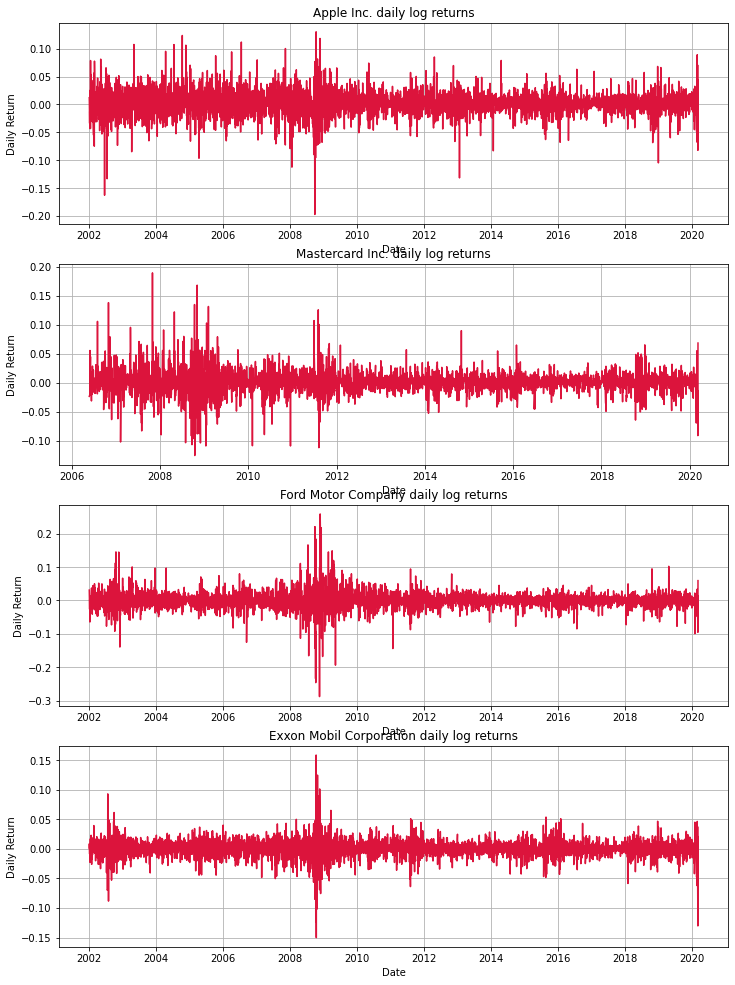

In [ ]:
fig = plt.figure(figsize=[12,17])
ax1=fig.add_subplot(4, 1, 1)
ax1.title.set_text('Apple Inc. daily log returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return')
ax1.grid(True)
ax1.plot(AAPL['Return'],color='#DC143C')
ax2=fig.add_subplot(4, 1, 2)
ax2.title.set_text('Mastercard Inc. daily log returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Return')
ax2.plot(MAST['Return'],color='#DC143C')
ax2.grid(True)
ax3=fig.add_subplot(4, 1, 3)
ax3.title.set_text('Ford Motor Company daily log returns')
ax3.set_xlabel('Date')
ax3.set_ylabel('Daily Return')
ax3.plot(FORD['Return'],color='#DC143C')
ax3.grid(True)
ax4=fig.add_subplot(4, 1, 4)
ax4.title.set_text('Exxon Mobil Corporation daily log returns')
ax4.set_xlabel('Date')
ax4.set_ylabel('Daily Return')
ax4.plot(EXON['Return'],color='#DC143C')
ax4.grid(True)
plt.show()

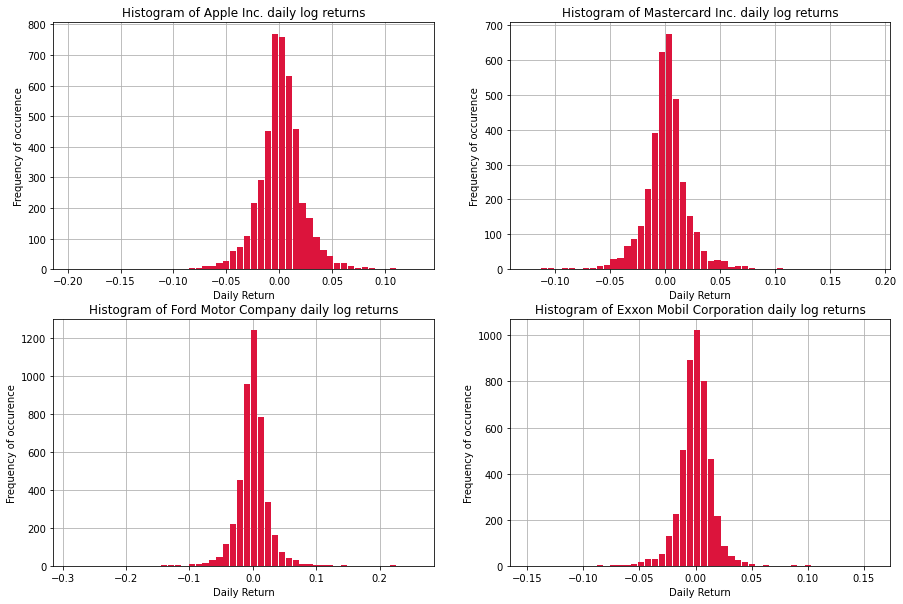

In [ ]:
fig = plt.figure(figsize=[15,10])
ax1=fig.add_subplot(2, 2, 1)
ax1.title.set_text('Histogram of Apple Inc. daily log returns')
ax1.set_xlabel('Daily Return')
ax1.set_ylabel('Frequency of occurence')
ax1.grid(True)
ax1.hist(AAPL['Return'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
ax2=fig.add_subplot(2, 2, 2)
ax2.title.set_text('Histogram of Mastercard Inc. daily log returns')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Frequency of occurence')
ax2.hist(MAST['Return'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
ax2.grid(True)
ax3=fig.add_subplot(2, 2, 3)
ax3.title.set_text('Histogram of Ford Motor Company daily log returns')
ax3.set_xlabel('Daily Return')
ax3.set_ylabel('Frequency of occurence')
ax3.hist(FORD['Return'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
ax3.grid(True)
ax4=fig.add_subplot(2, 2, 4)
ax4.title.set_text('Histogram of Exxon Mobil Corporation daily log returns')
ax4.set_xlabel('Daily Return')
ax4.set_ylabel('Frequency of occurence')
ax4.hist(EXON['Return'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
ax4.grid(True)
plt.show()

In this step I check to see if the daily log returns are better represented by 
a normal distribution or by a Student-t distribution.

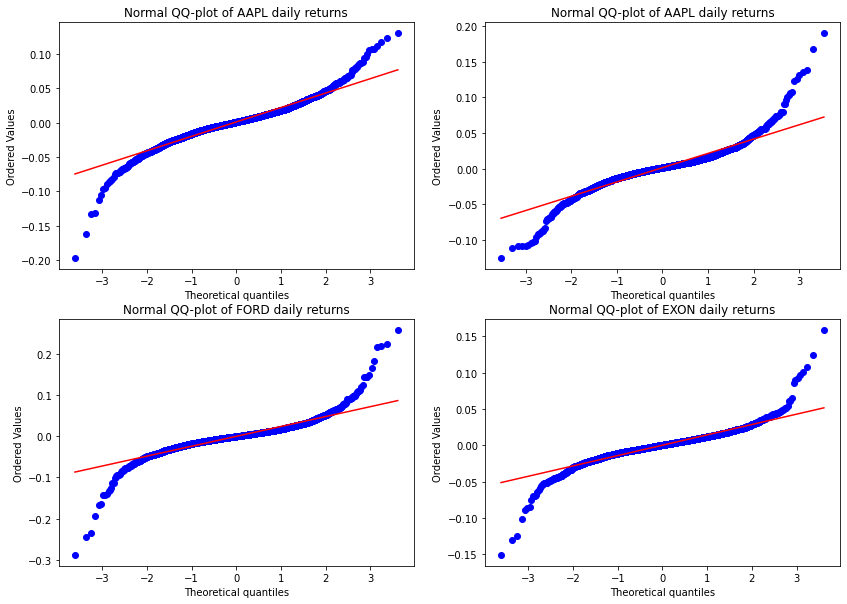

In [ ]:
fig = plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
mean_AAPL, sigma_AAPL = scipy.stats.norm.fit(AAPL['Return'])
scipy.stats.probplot(AAPL['Return'], dist=scipy.stats.norm, plot=ax1)
ax1.title.set_text('Normal QQ-plot of AAPL daily returns')
ax2 = plt.subplot(222)
mean_MAST, sigma_MAST = scipy.stats.norm.fit(MAST['Return'])
scipy.stats.probplot(MAST['Return'], dist=scipy.stats.norm, plot=ax2)
ax2.title.set_text('Normal QQ-plot of AAPL daily returns')
ax3 = plt.subplot(223)
mean_FORD, sigma_FORD = scipy.stats.norm.fit(FORD['Return'])
scipy.stats.probplot(FORD['Return'], dist=scipy.stats.norm, plot=ax3)
ax3.title.set_text('Normal QQ-plot of FORD daily returns')
ax4 = plt.subplot(224)
mean_EXON, sigma_EXON = scipy.stats.norm.fit(EXON['Return'])
scipy.stats.probplot(EXON['Return'], dist=scipy.stats.norm, plot=ax4)
ax4.title.set_text('Normal QQ-plot of EXON daily returns')
plt.show()

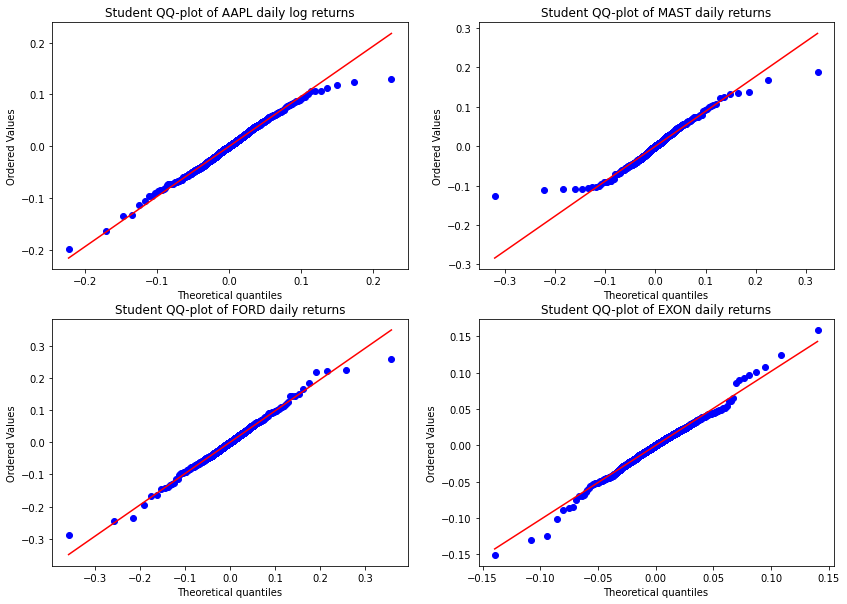

In [ ]:
fig = plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
tdf_AAPL, tmean_AAPL, tsigma_AAPL = scipy.stats.t.fit(AAPL['Return'])
scipy.stats.probplot(AAPL['Return'], dist=scipy.stats.t,sparams=(tdf_AAPL, tmean_AAPL, tsigma_AAPL), plot=ax1)
ax1.title.set_text('Student QQ-plot of AAPL daily log returns')
ax2 = plt.subplot(222)
tdf_MAST, tmean_MAST, tsigma_MAST = scipy.stats.t.fit(MAST['Return'])
scipy.stats.probplot(MAST['Return'], dist=scipy.stats.t,sparams=(tdf_MAST, tmean_MAST, tsigma_MAST), plot=ax2)
ax2.title.set_text('Student QQ-plot of MAST daily returns')
ax3 = plt.subplot(223)
tdf_FORD, tmean_FORD, tsigma_FORD = scipy.stats.t.fit(FORD['Return'])
scipy.stats.probplot(FORD['Return'], dist=scipy.stats.t,sparams=(tdf_FORD, tmean_FORD, tsigma_FORD), plot=ax3)
ax3.title.set_text('Student QQ-plot of FORD daily returns')
ax4 = plt.subplot(224)
tdf_EXON, tmean_EXON, tsigma_EXON = scipy.stats.t.fit(EXON['Return'])
scipy.stats.probplot(EXON['Return'], dist=scipy.stats.t,sparams=(tdf_EXON, tmean_EXON, tsigma_EXON), plot=ax4)
ax4.title.set_text('Student QQ-plot of EXON daily returns')
plt.show()

Student’s t distribution does seem to fit better (In particular at the tails of the distribution).
In this step I am calculating the analytic quantiles by curve fitting to historical data. Here, I use Student’s t distribution (we checked above that it represents daily returns relatively well).

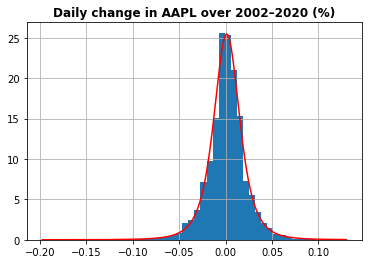

In [ ]:
support = np.linspace(AAPL['Return'].min(), AAPL['Return'].max(), 1000)
AAPL['Return'].hist(bins=50,density=True);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean_AAPL, scale=tsigma_AAPL,df=tdf_AAPL),"r-")
plt.title("Daily change in AAPL over 2002–2020 (%)", weight="bold");

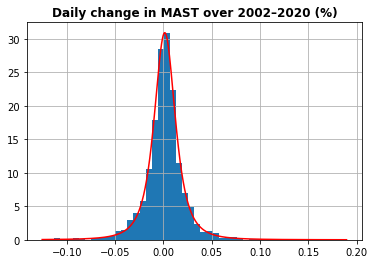

In [ ]:
support = np.linspace(MAST['Return'].min(), MAST['Return'].max(), 1000)
MAST['Return'].hist(bins=50,density=True);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean_MAST, scale=tsigma_MAST,df=tdf_MAST),"r-")
plt.title("Daily change in MAST over 2002–2020 (%)", weight="bold");

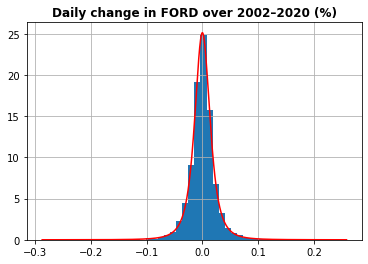

In [ ]:
support = np.linspace(FORD['Return'].min(), FORD['Return'].max(), 1000)
FORD['Return'].hist(bins=50,density=True);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean_FORD, scale=tsigma_FORD,df=tdf_FORD),"r-")
plt.title("Daily change in FORD over 2002–2020 (%)", weight="bold");

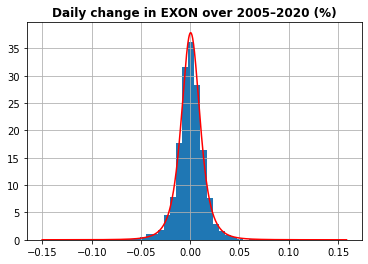

In [ ]:
support = np.linspace(EXON['Return'].min(), EXON['Return'].max(), 1000)
EXON['Return'].hist(bins=50,density=True);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean_EXON, scale=tsigma_EXON,df=tdf_EXON),"r-")
plt.title("Daily change in EXON over 2005–2020 (%)", weight="bold");

Now I have to calculate the correlation between the different stocks:

In [ ]:
data=pd.concat([AAPL['Return'],MAST['Return'],FORD['Return'],EXON['Return']],axis=1)
column_names = data.columns.values
column_names[0] = 'AAPL'
column_names[1] = 'MAST'
column_names[2] = 'FORD'
column_names[3] = 'EXON'
corr=data.corr()

In [ ]:
corr.style.background_gradient(cmap='cool').set_precision(3)

,AAPL,MAST,FORD,EXON
AAPL,1.000,0.457,0.329,0.372
MAST,0.457,1.000,0.397,0.446
FORD,0.329,0.397,1.000,0.346
EXON,0.372,0.446,0.346,1.000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


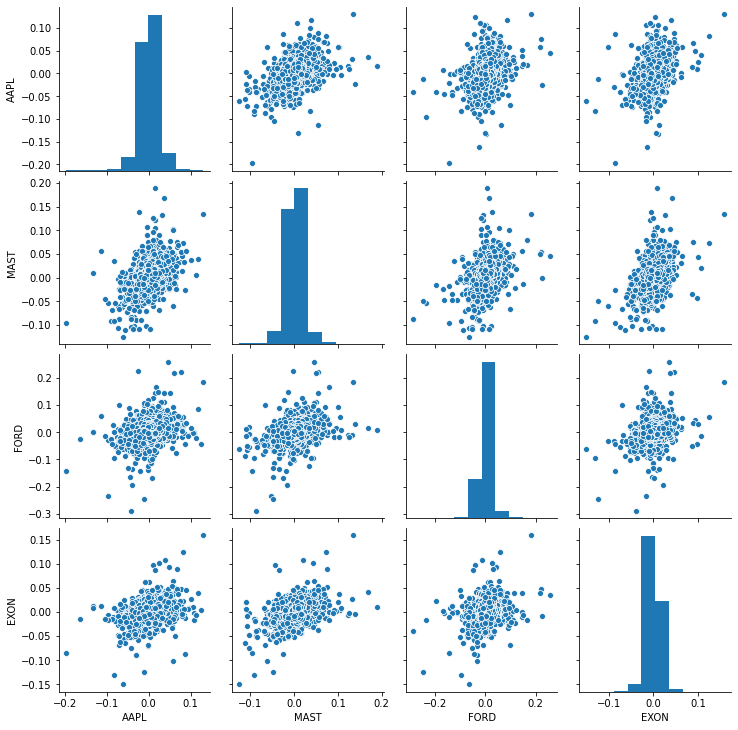

In [ ]:
import seaborn as sns
sns.pairplot(data);

Auto correlation of Dataset.




In [ ]:
from statsmodels.graphics import tsaplots

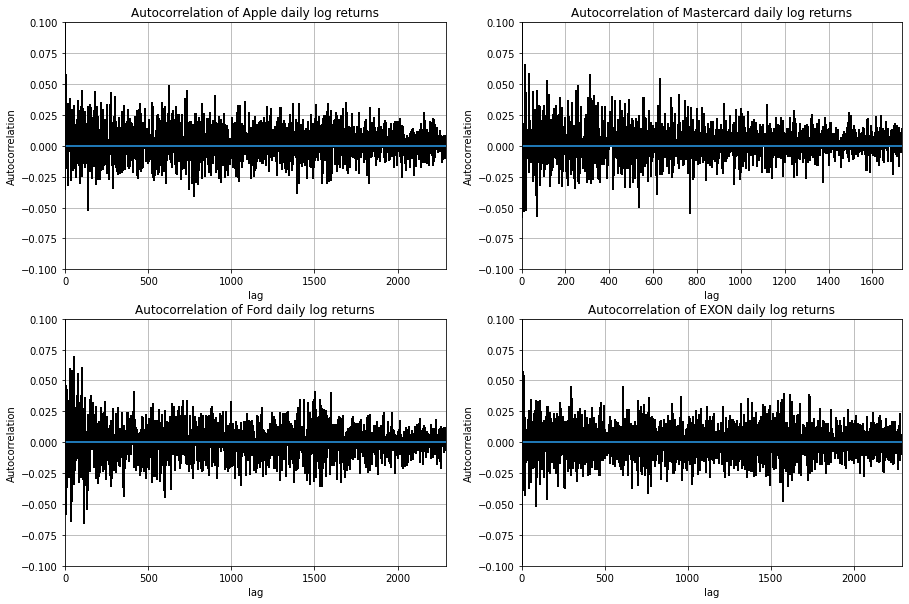

In [ ]:
# Display the autocorrelation plot of your time series
fig = plt.figure(figsize=[15,10])
ax1=fig.add_subplot(2, 2, 1)
ax1.title.set_text('Autocorrelation of Apple daily log returns')
ax1.set_xlabel('lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)
ax1.acorr(AAPL['Return'],maxlags=int(len(AAPL)/2),usevlines=True, normed=True, lw=2);
ax1.set_xlim(0,len(AAPL)/2);
ax1.set_ylim(-0.1,0.1);
ax2=fig.add_subplot(2, 2, 2)
ax2.title.set_text('Autocorrelation of Mastercard daily log returns')
ax2.set_xlabel('lag')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)
ax2.acorr(MAST['Return'],maxlags=int(len(MAST)/2),usevlines=True, normed=True, lw=2);
ax2.set_xlim(0,len(MAST)/2);
ax2.set_ylim(-0.1,0.1);
ax3=fig.add_subplot(2, 2, 3)
ax3.title.set_text('Autocorrelation of Ford daily log returns')
ax3.set_xlabel('lag')
ax3.set_ylabel('Autocorrelation')
ax3.grid(True)
FORD.dropna(axis=0,inplace=True)
ax3.acorr(FORD['Return'],maxlags=int(len(FORD)/2),usevlines=True, normed=True, lw=2);
ax3.set_xlim(0,len(FORD)/2);
ax3.set_ylim(-0.1,0.1);
ax4=fig.add_subplot(2, 2, 4)
ax4.title.set_text('Autocorrelation of EXON daily log returns')
ax4.set_xlabel('lag')
ax4.set_ylabel('Autocorrelation')
ax4.grid(True)
ax4.acorr(EXON['Return'],maxlags=int(len(EXON)/2),usevlines=True, normed=True, lw=2);
ax4.set_xlim(0,len(EXON)/2);
ax4.set_ylim(-0.1,0.1);

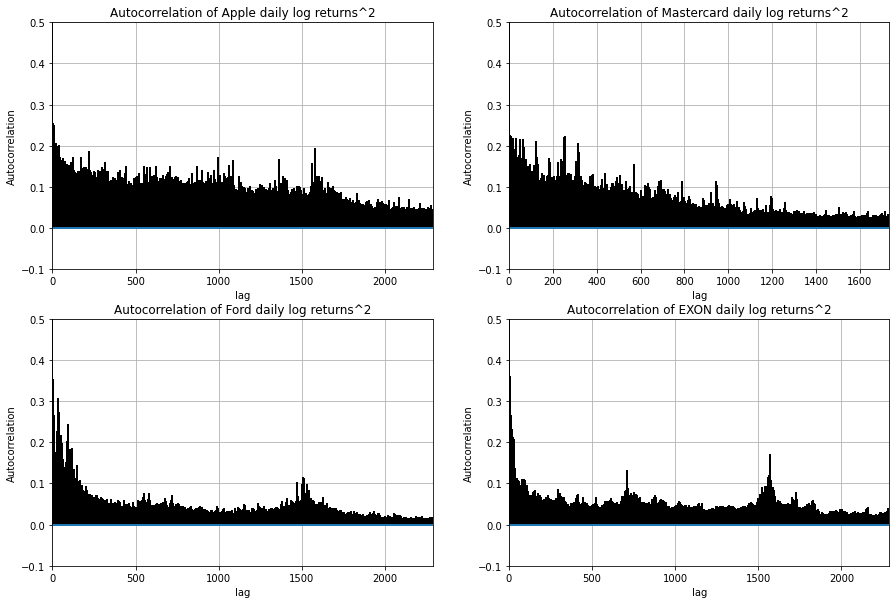

In [ ]:
# Display the autocorrelation plot of the square of time series
fig = plt.figure(figsize=[15,10])
ax1=fig.add_subplot(2, 2, 1)
ax1.title.set_text('Autocorrelation of Apple daily log returns^2')
ax1.set_xlabel('lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)
ax1.acorr(AAPL['Return']**2,maxlags=int(len(AAPL)/2),usevlines=True, normed=True, lw=2);
ax1.set_xlim(0,len(AAPL)/2);
ax1.set_ylim(-.1,0.5);
ax2=fig.add_subplot(2, 2, 2)
ax2.title.set_text('Autocorrelation of Mastercard daily log returns^2')
ax2.set_xlabel('lag')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)
ax2.acorr(MAST['Return']**2,maxlags=int(len(MAST)/2),usevlines=True, normed=True, lw=2);
ax2.set_xlim(0,len(MAST)/2);
ax2.set_ylim(-.1,0.5);
ax3=fig.add_subplot(2, 2, 3)
ax3.title.set_text('Autocorrelation of Ford daily log returns^2')
ax3.set_xlabel('lag')
ax3.set_ylabel('Autocorrelation')
ax3.grid(True)
ax3.acorr(FORD['Return']**2,maxlags=int(len(FORD)/2),usevlines=True, normed=True, lw=2);
ax3.set_xlim(0,len(FORD)/2);
ax3.set_ylim(-.1,0.5);
ax4=fig.add_subplot(2, 2, 4)
ax4.title.set_text('Autocorrelation of EXON daily log returns^2')
ax4.set_xlabel('lag')
ax4.set_ylabel('Autocorrelation')
ax4.grid(True)
ax4.acorr(EXON['Return']**2,maxlags=int(len(EXON)/2),usevlines=True, normed=True, lw=2);
ax4.set_xlim(0,len(EXON)/2);
ax4.set_ylim(-.1,0.5);

Skewness and Kurtosis

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

Ku_AAPL= kurtosis(AAPL['Return'])
Sk_AAPL =skew(AAPL['Return'])
Ku_FORD= kurtosis(FORD['Return'])
Sk_FORD =skew(FORD['Return'])
Ku_MAST= kurtosis(MAST['Return'])
Sk_MAST =skew(MAST['Return'])
Ku_EXON= kurtosis(EXON['Return'])
Sk_EXON =skew(EXON['Return'])
data={'Kurtosis':[Ku_AAPL,Ku_MAST,Ku_FORD,Ku_EXON],
      'Skewness':[Sk_AAPL,Sk_MAST,Sk_FORD,Sk_EXON]}
STAT_DATA=pd.DataFrame(data,index=['Apple','Mastercard','Ford','Exon'])
STAT_DATA

,Kurtosis,Skewness
Apple,5.642884,-0.199756
Mastercard,8.719550,0.362088
Ford,17.002669,-0.016317
Exon,12.596108,-0.194201


In [ ]:
AAPL.drop('Return',axis=1,inplace=True);
MAST.drop('Return',axis=1,inplace=True);
FORD.drop('Return',axis=1,inplace=True);
EXON.drop('Return',axis=1,inplace=True);

## LSTM for Stock price

### APPLE

In [ ]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-03,1.642857,1.696429,1.626429,1.684286,1.462029,153001800
2002-01-04,1.667143,1.710714,1.642143,1.692143,1.468849,102494000
2002-01-07,1.694286,1.714286,1.625000,1.635714,1.419867,111146000
2002-01-08,1.625000,1.646429,1.604286,1.615000,1.401886,112509600
2002-01-09,1.628571,1.637857,1.520000,1.546429,1.342363,81958800


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
AAPL_lstm = AAPL[['Adj Close', 'Open','High','Low','Close','Volume']]
AAPL_lstm.head()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2002-01-03,1.462029,1.642857,1.696429,1.626429,1.684286,153001800
2002-01-04,1.468849,1.667143,1.710714,1.642143,1.692143,102494000
2002-01-07,1.419867,1.694286,1.714286,1.625000,1.635714,111146000
2002-01-08,1.401886,1.625000,1.646429,1.604286,1.615000,112509600
2002-01-09,1.342363,1.628571,1.637857,1.520000,1.546429,81958800


Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
memory_days=180 #Setting memory days for SVR look back (Number of predictors)
p_days=1 #Prediction days
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  AAPL_lstm[op]=AAPL_lstm['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


drop the unnecceray columns.

In [ ]:
AAPL_lstm.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
AAPL_lstm.drop(AAPL_lstm.index[0:memory_days+p_days],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


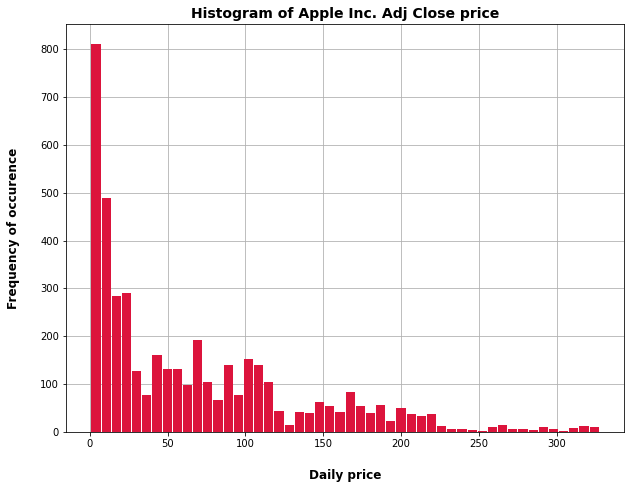

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(AAPL_lstm['Adj Close'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of Apple Inc. Adj Close price',weight='bold',size=14)
plt.xlabel('Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

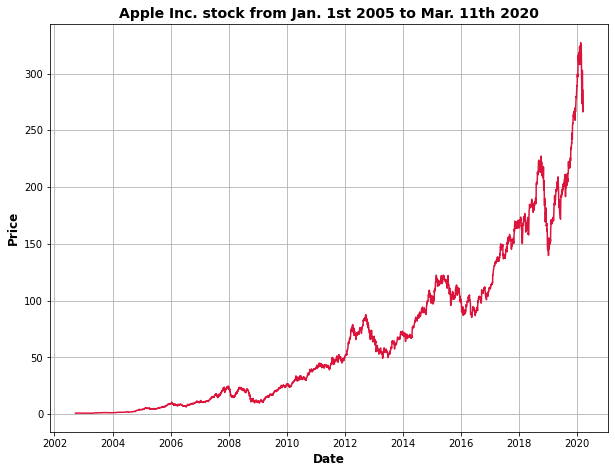

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_lstm['Adj Close'],color='#DC143C')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)

save dataset

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
AAPL_lstm.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-23,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,0.946164,0.956705,0.931284,...,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849
2002-09-24,0.907722,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,0.946164,0.956705,...,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867
2002-09-25,0.925704,0.907722,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,0.946164,...,1.492411,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886
2002-09-26,0.911443,0.925704,0.907722,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,...,1.511631,1.492411,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,

In [ ]:
dataset = AAPL_lstm.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4396, 180)

In [ ]:
Y.shape

(4396,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

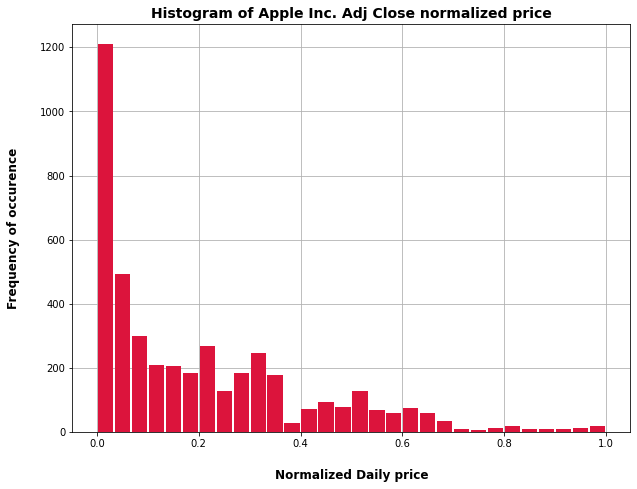

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(Y,bins=30,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of Apple Inc. Adj Close normalized price',weight='bold',size=14)
plt.xlabel('Normalized Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

#### Train on 75% of apple dataset 

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4396
3077 1319
3077 1319


In [ ]:
testX.shape

(1319, 180)

In [ ]:
trainY.shape

(3077, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(3077, 1, 180)

In [ ]:
model_A = Sequential()
model_A.add(LSTM(128, input_shape=(1, memory_days), return_sequences=True))
model_A.add(LSTM(64, input_shape=(1,  memory_days), return_sequences=False))
model_A.add(Dense(16))
model_A.add(Dense(1))
adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_A.compile(loss='mean_squared_error', optimizer=adam)
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            158208    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 208,673
Trainable params: 208,673
Non-trainable params: 0
_________________________________________________________________


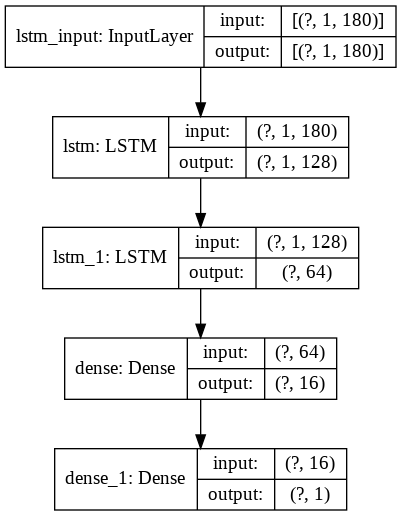

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(model_A, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

In [ ]:
model_A.fit(trainX, trainY, validation_split=0.25, epochs=100, batch_size=256, verbose=2);

Epoch 1/100
10/10 - 1s - loss: 0.0013 - val_loss: 0.0017
Epoch 2/100
10/10 - 0s - loss: 2.8908e-04 - val_loss: 0.0020
Epoch 3/100
10/10 - 0s - loss: 1.2657e-04 - val_loss: 0.0011
Epoch 4/100
10/10 - 0s - loss: 9.8722e-05 - val_loss: 0.0011
Epoch 5/100
10/10 - 0s - loss: 8.3539e-05 - val_loss: 0.0022
Epoch 6/100
10/10 - 0s - loss: 7.8222e-05 - val_loss: 0.0010
Epoch 7/100
10/10 - 0s - loss: 6.2134e-05 - val_loss: 0.0013
Epoch 8/100
10/10 - 0s - loss: 5.8213e-05 - val_loss: 0.0011
Epoch 9/100
10/10 - 0s - loss: 5.2242e-05 - val_loss: 9.9108e-04
Epoch 10/100
10/10 - 0s - loss: 5.4102e-05 - val_loss: 9.0621e-04
Epoch 11/100
10/10 - 0s - loss: 6.3443e-05 - val_loss: 0.0013
Epoch 12/100
10/10 - 0s - loss: 5.0164e-05 - val_loss: 5.5209e-04
Epoch 13/100
10/10 - 0s - loss: 4.3310e-05 - val_loss: 5.0499e-04
Epoch 14/100
10/10 - 0s - loss: 4.4646e-05 - val_loss: 5.4322e-04
Epoch 15/100
10/10 - 0s - loss: 3.9453e-05 - val_loss: 6.4079e-04
Epoch 16/100
10/10 - 0s - loss: 3.3186e-05 - val_loss: 3.49

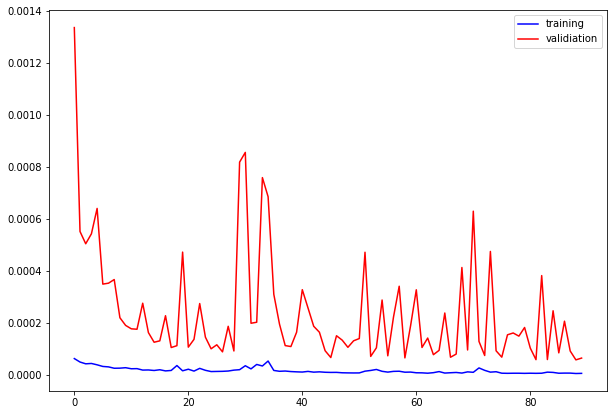

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(model_A.history.history['loss'][10:],'b',label='training')
plt.plot(model_A.history.history['val_loss'][10:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = model_A.predict(testX)

In [ ]:
testX.shape

(1319, 1, 180)

In [ ]:
testPredict.shape

(1319, 1)

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1319, 1)


(1319, 180)

In [ ]:
testPredict.shape

(1319, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
AAPL_lstm.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-23,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,0.946164,0.956705,0.931284,...,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849
2002-09-24,0.907722,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,0.946164,0.956705,...,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867
2002-09-25,0.925704,0.907722,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,0.946164,...,1.492411,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886
2002-09-26,0.911443,0.925704,0.907722,0.920743,0.921983,0.904003,0.931284,0.917643,0.899042,0.878581,0.876721,0.886022,0.888502,0.890982,0.891602,0.879201,0.897802,0.871141,0.914543,0.911443,0.911443,0.920743,0.962906,0.975306,0.990186,0.999487,0.986466,0.990807,0.980266,0.967865,0.940584,0.904622,0.929423,0.930044,0.948645,0.931904,0.913923,0.867421,0.895942,0.917643,...,1.511631,1.492411,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,

In [ ]:
AAPL_lstm.reset_index(inplace=True)
AAPL_lstm['Date'] = pd.to_datetime(AAPL_lstm['Date'])
AAPL_lstm.insert (1, 'Y', Y_n)
AAPL_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
AAPL_predict=pd.DataFrame(AAPL_lstm.tail(len(testPredict_n)))
AAPL_predict.drop('Y',inplace=True,axis=1)

In [ ]:
AAPL_predict.reset_index(inplace=True)
AAPL_predict['Date'] = pd.to_datetime(AAPL_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
AAPL_predict.insert (1, 'Y', testPredict_n)
AAPL_predict.set_index('Date',inplace=True)

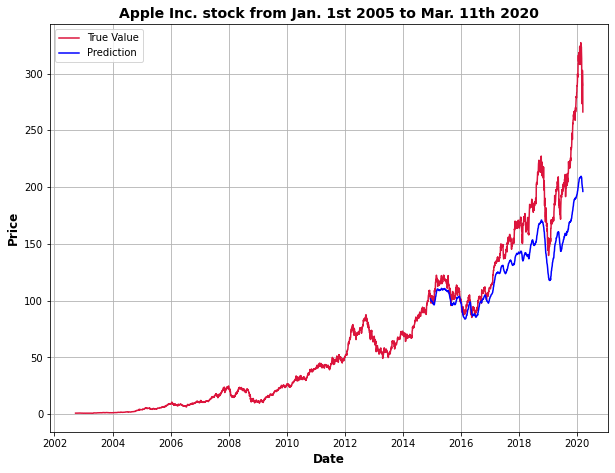

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_lstm['Y'],color='#DC143C',label='True Value')
plt.plot(AAPL_predict['Y'],color='b',label='Prediction')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

1238.6019

In [ ]:
def mean_absolute_percentage_error(testY_n, testPredict_n): 
     return np.mean(np.abs((testY_n - testPredict_n) / testY_n)) * 100

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    13.748108
dtype: float32

#### Train on the entire apple dataset

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.99)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4396
4352 44
4352 44


In [ ]:
testX.shape

(44, 180)

In [ ]:
trainY.shape

(4352, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(4352, 1, 180)

In [ ]:
model = Sequential()
model.reset_states
model.add(LSTM(128, input_shape=(1, memory_days), return_sequences=True))
#model.add(Dropout(0.50))
model.add(LSTM(64, input_shape=(1,  memory_days), return_sequences=False))
#model.add(Dropout(0.50))
model.add(Dense(16))
model.add(Dense(1))
adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            158208    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 208,673
Trainable params: 208,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, validation_split=0.25, epochs=100, batch_size=256, verbose=2);

Epoch 1/100
13/13 - 1s - loss: 0.0045 - val_loss: 0.0504
Epoch 2/100
13/13 - 0s - loss: 0.0011 - val_loss: 0.0121
Epoch 3/100
13/13 - 0s - loss: 4.8435e-04 - val_loss: 0.0178
Epoch 4/100
13/13 - 0s - loss: 3.8419e-04 - val_loss: 0.0218
Epoch 5/100
13/13 - 0s - loss: 3.3980e-04 - val_loss: 0.0192
Epoch 6/100
13/13 - 0s - loss: 2.9807e-04 - val_loss: 0.0168
Epoch 7/100
13/13 - 0s - loss: 2.6819e-04 - val_loss: 0.0157
Epoch 8/100
13/13 - 0s - loss: 2.4274e-04 - val_loss: 0.0140
Epoch 9/100
13/13 - 0s - loss: 2.1665e-04 - val_loss: 0.0125
Epoch 10/100
13/13 - 0s - loss: 1.9433e-04 - val_loss: 0.0120
Epoch 11/100
13/13 - 0s - loss: 1.6421e-04 - val_loss: 0.0115
Epoch 12/100
13/13 - 0s - loss: 1.3635e-04 - val_loss: 0.0112
Epoch 13/100
13/13 - 0s - loss: 1.1266e-04 - val_loss: 0.0132
Epoch 14/100
13/13 - 0s - loss: 9.5567e-05 - val_loss: 0.0093
Epoch 15/100
13/13 - 0s - loss: 8.9861e-05 - val_loss: 0.0112
Epoch 16/100
13/13 - 0s - loss: 7.9496e-05 - val_loss: 0.0126
Epoch 17/100
13/13 - 0s -

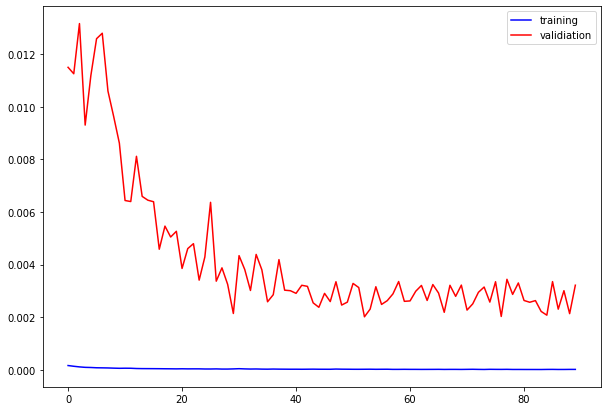

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(model.history.history['loss'][10:],'b',label='training')
plt.plot(model.history.history['val_loss'][10:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = model.predict(testX)

In [ ]:
testX.shape

(44, 1, 180)

In [ ]:
testPredict.shape

(44, 1)

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(44, 1)


(44, 180)

In [ ]:
testPredict.shape

(44, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
AAPL_lstm.tail()

,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,289.320007,302.739990,289.320007,298.809998,273.359985,273.519989,292.649994,288.079987,298.179993,313.049988,320.299988,323.619995,319.000000,324.950012,324.869995,327.200012,319.609985,321.549988,320.029999,324.440002,320.688934,318.095062,307.929199,308.777191,323.103180,323.572052,316.937805,308.218506,317.556335,318.474182,316.947815,315.820465,317.975372,314.493591,310.602844,311.939667,316.209534,309.595215,308.896912,302.472137,...,199.406647,199.913925,201.574982,197.225006,195.203613,191.576981,202.159607,206.529373,211.097366,206.876190,207.767990,205.845688,205.132263,206.767212,206.935638,205.330429,200.742645,203.784653,201.495712,202.635223,203.338760,201.446182,199.910309,201.376816,199.404968,198.196075,202.367676,202.546051,200.881363,199.712143,196.115219,197.918640,197.978088,193.786667,196.769211,196.967377,197.641190,196.065689,196.640396,192.121979
2020-03-05,302.739990,292.920013,302.739990,289.320007,298.809998,273.359985,273.519989,292.649994,288.079987,298.179993,313.049988,320.299988,323.619995,319.000000,324.950012,324.869995,327.200012,319.609985,321.549988,320.029999,324.440002,320.688934,318.095062,307.929199,308.777191,323.103180,323.572052,316.937805,308.218506,317.556335,318.474182,316.947815,315.820465,317.975372,314.493591,310.602844,311.939667,316.209534,309.595215,308.896912,...,207.851212,199.406647,199.913925,201.574982,197.225006,195.203613,191.576981,202.159607,206.529373,211.097366,206.876190,207.767990,205.845688,205.132263,206.767212,206.935638,205.330429,200.742645,203.784653,201.495712,202.635223,203.338760,201.446182,199.910309,201.376816,199.404968,198.196075,202.367676,202.546051,200.881363,199.712143,196.115219,197.918640,197.978088,193.786667,196.769211,196.967377,197.641190,196.065689,196.640396
2020-03-06,292.920013,289.029999,292.920013,302.739990,289.320007,298.809998,273.359985,273.519989,292.649994,288.079987,298.179993,313.049988,320.299988,323.619995,319.000000,324.950012,324.869995,327.200012,319.609985,321.549988,320.029999,324.440002,320.688934,318.095062,307.929199,308.777191,323.103180,323.572052,316.937805,308.218506,317.556335,318.474182,316.947815,315.820465,317.975372,314.493591,310.602844,311.939667,316.209534,309.595215,...,201.664505,207.851212,199.406647,199.913925,201.574982,197.225006,195.203613,191.576981,202.159607,206.529373,211.097366,206.876190,207.767990,205.845688,205.132263,206.767212,206.935638,205.330429,200.742645,203.784653,201.495712,202.635223,203.338760,201.446182,199.910309,201.376816,199.404968,198.196075,202.367676,202.546051,200.881363,199.712143,196.115219,197.918640,197.978088,193.786667,196.769211,196.967377,197.641190,196.065689
2020-03-09,289.029999,266.170013,289.029999,292.920013,302.739990,289.320007,298.809998,273.359985,273.519989,292.649994,288.079987,298.179993,313.049988,320.299988,32

In [ ]:
AAPL_lstm.drop('Y',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
AAPL_lstm.reset_index(inplace=True)
AAPL_lstm['Date'] = pd.to_datetime(AAPL_lstm['Date'])
AAPL_lstm.insert (1, 'Y', Y_n)
AAPL_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
AAPL_predict=pd.DataFrame(AAPL_lstm.tail(len(testPredict_n)))
AAPL_predict.drop('Y',inplace=True,axis=1)

In [ ]:
AAPL_predict.reset_index(inplace=True)
AAPL_predict['Date'] = pd.to_datetime(AAPL_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
AAPL_predict.insert (1, 'Y', testPredict_n)
AAPL_predict.set_index('Date',inplace=True)

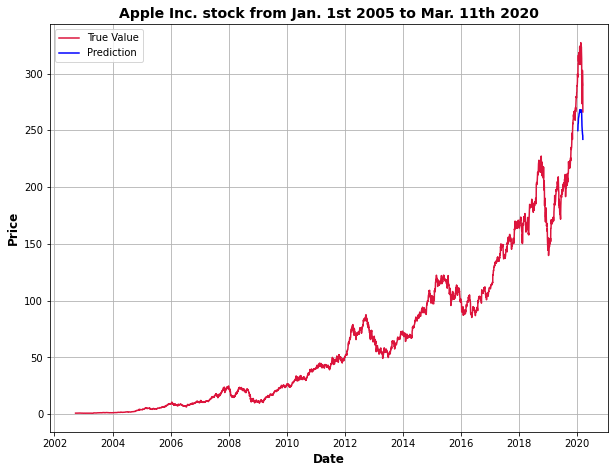

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_lstm['Y'],color='#DC143C',label='True Value')
plt.plot(AAPL_predict['Y'],color='b',label='Prediction')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

2423.345

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    15.527536
dtype: float32

### Mastercard

In [ ]:
MAST.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-05-26,4.630,4.674,4.411,4.493,3.373335,103044000
2006-05-30,4.497,4.498,4.285,4.400,3.303510,49898000
2006-05-31,4.435,4.536,4.435,4.494,3.374085,30002000
2006-06-01,4.493,4.810,4.490,4.751,3.567040,62344000
2006-06-02,4.850,4.870,4.679,4.699,3.527998,37253000


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
MAST_lstm = MAST[['Adj Close', 'Open','High','Low','Close','Volume']]
MAST_lstm.head()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2006-05-26,3.373335,4.630,4.674,4.411,4.493,103044000
2006-05-30,3.303510,4.497,4.498,4.285,4.400,49898000
2006-05-31,3.374085,4.435,4.536,4.435,4.494,30002000
2006-06-01,3.567040,4.493,4.810,4.490,4.751,62344000
2006-06-02,3.527998,4.850,4.870,4.679,4.699,37253000


Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  MAST_lstm[op]=MAST_lstm['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


drop the unnecceray columns.

In [ ]:
MAST_lstm.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
MAST_lstm.drop(MAST_lstm.index[0:memory_days+p_days],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


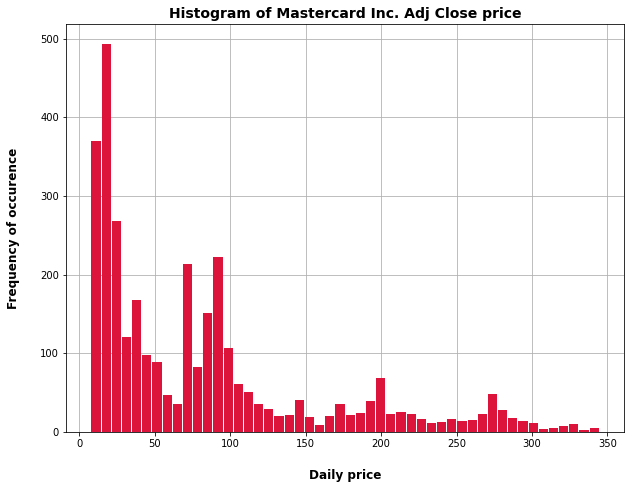

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(MAST_lstm['Adj Close'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of Mastercard Inc. Adj Close price',weight='bold',size=14)
plt.xlabel('Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

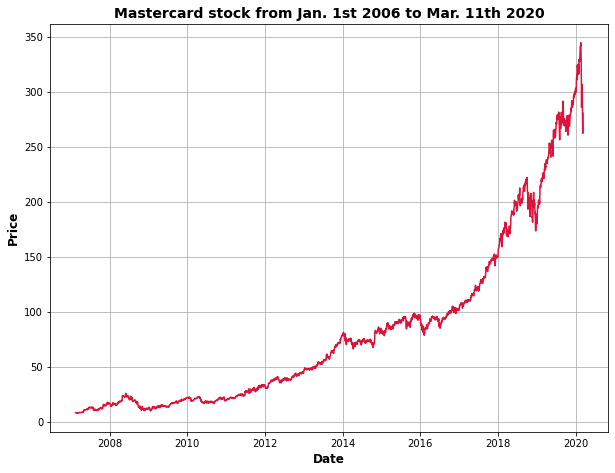

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_lstm['Adj Close'],color='#DC143C')
plt.title('Mastercard stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)

save dataset

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
MAST_lstm.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02-15,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,7.279997,7.416907,7.408540,7.066257,...,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510
2007-02-16,8.309879,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,7.279997,7.416907,7.408540,...,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085
2007-02-20,8.271521,8.309879,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,7.279997,7.416907,...,3.492711,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040
2007-02-21,8.230860,8.271521,8.309879,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,7.279997,...,3.476193,3.492711,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,

In [ ]:
dataset = MAST_lstm.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(3289, 180)

In [ ]:
Y.shape

(3289,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

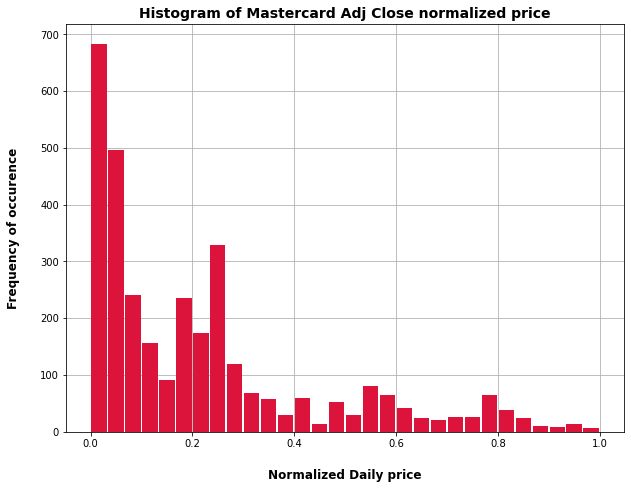

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(Y,bins=30,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of Mastercard Adj Close normalized price',weight='bold',size=14)
plt.xlabel('Normalized Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

3289
2466 823
2466 823


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(2466, 1, 180)

#### Training on mastercard historical data


In [ ]:
#del model_M
model_M = Sequential()
model_M.add(LSTM(128, input_shape=(1, memory_days), return_sequences=True))
#model.add(Dropout(0.50))
model_M.add(LSTM(64, input_shape=(1,  memory_days), return_sequences=False))
#model.add(Dropout(0.50))
model_M.add(Dense(16))
model_M.add(Dense(1))
adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_M.compile(loss='mean_squared_error', optimizer=adam)
model_M.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 128)            158208    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 208,673
Trainable params: 208,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_M.fit(trainX, trainY, validation_split=0.25, epochs=100, batch_size=256, verbose=2);

Epoch 1/100
8/8 - 1s - loss: 0.0029 - val_loss: 0.0033
Epoch 2/100
8/8 - 0s - loss: 8.7090e-04 - val_loss: 0.0061
Epoch 3/100
8/8 - 0s - loss: 4.9758e-04 - val_loss: 5.3087e-04
Epoch 4/100
8/8 - 0s - loss: 2.1246e-04 - val_loss: 3.9471e-04
Epoch 5/100
8/8 - 0s - loss: 1.2419e-04 - val_loss: 8.4891e-04
Epoch 6/100
8/8 - 0s - loss: 1.0733e-04 - val_loss: 8.8524e-04
Epoch 7/100
8/8 - 0s - loss: 9.8237e-05 - val_loss: 4.2736e-04
Epoch 8/100
8/8 - 0s - loss: 9.0706e-05 - val_loss: 3.5130e-04
Epoch 9/100
8/8 - 0s - loss: 8.7624e-05 - val_loss: 2.3811e-04
Epoch 10/100
8/8 - 0s - loss: 8.5552e-05 - val_loss: 2.9736e-04
Epoch 11/100
8/8 - 0s - loss: 8.4377e-05 - val_loss: 3.0836e-04
Epoch 12/100
8/8 - 0s - loss: 7.9123e-05 - val_loss: 2.3519e-04
Epoch 13/100
8/8 - 0s - loss: 7.5081e-05 - val_loss: 2.9643e-04
Epoch 14/100
8/8 - 0s - loss: 7.6327e-05 - val_loss: 1.5782e-04
Epoch 15/100
8/8 - 0s - loss: 7.0316e-05 - val_loss: 2.1329e-04
Epoch 16/100
8/8 - 0s - loss: 6.5782e-05 - val_loss: 1.7729e-

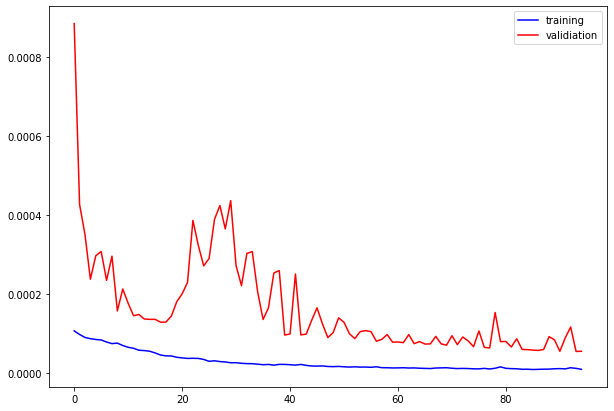

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(model_M.history.history['loss'][5:],'b',label='training')
plt.plot(model_M.history.history['val_loss'][5:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
print(testX.shape)
testPredict = model_M.predict(testX)
#testPerdict= model.

(823, 1, 180)


In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(823, 1)


(823, 180)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
MAST_lstm.reset_index(inplace=True)
MAST_lstm['Date'] = pd.to_datetime(MAST_lstm['Date'])
MAST_lstm.insert (1, 'Y', Y_n)
MAST_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
MAST_predict=pd.DataFrame(MAST_lstm.tail(len(testPredict_n)))
MAST_predict.drop('Y',inplace=True,axis=1)

In [ ]:
MAST_predict.reset_index(inplace=True)
MAST_predict['Date'] = pd.to_datetime(MAST_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
MAST_predict.insert (1, 'Y', testPredict_n)
MAST_predict.set_index('Date',inplace=True)

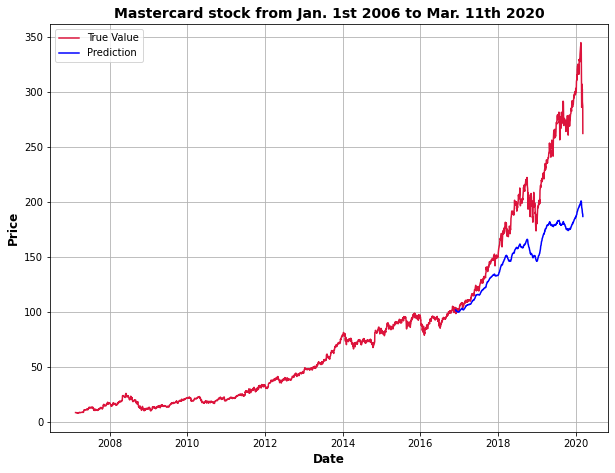

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_lstm['Y'],color='#DC143C',label='True Value')
plt.plot(MAST_predict['Y'],color='b',label='Prediction')
plt.title('Mastercard stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

3465.7375

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    19.64197
dtype: float32

#### Using the model trained on Apple data

In [ ]:
# make predictions
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testX.shape)
testPredict = model.predict(testX)
#testPerdict= model.

(823, 1, 180)


In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(823, 1)


(823, 180)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
MAST_lstm.reset_index(inplace=True)
MAST_lstm['Date'] = pd.to_datetime(MAST_lstm['Date'])
MAST_lstm.insert (1, 'Y_1', Y_n)
MAST_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
MAST_predict=pd.DataFrame(MAST_lstm.tail(len(testPredict_n)))
MAST_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
MAST_predict.reset_index(inplace=True)
MAST_predict['Date'] = pd.to_datetime(MAST_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
MAST_predict.insert (1, 'Y_1', testPredict_n)
MAST_predict.set_index('Date',inplace=True)

In [ ]:
MAST_lstm.head()

,Y_1,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02-15,8.286861,8.286861,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,7.279997,7.416907,...,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510
2007-02-16,8.288399,8.288399,8.309879,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,7.279997,...,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085
2007-02-20,8.309879,8.309879,8.271521,8.309879,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,7.328675,...,3.492711,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040
2007-02-21,8.271521,8.271521,8.230860,8.271521,8.309879,8.288399,8.286861,8.031399,7.831172,7.947784,8.802395,8.584523,8.480957,8.457940,8.512410,8.586056,8.557673,8.496297,8.418817,8.325224,8.275355,8.547700,8.316784,8.255411,8.057482,7.862624,8.365118,8.131897,8.074363,8.093539,8.035238,8.042907,7.688452,7.686932,7.693017,7.333238,7.491450,7.527199,7.558387,7.236640,...,3.476193,3.492711,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.

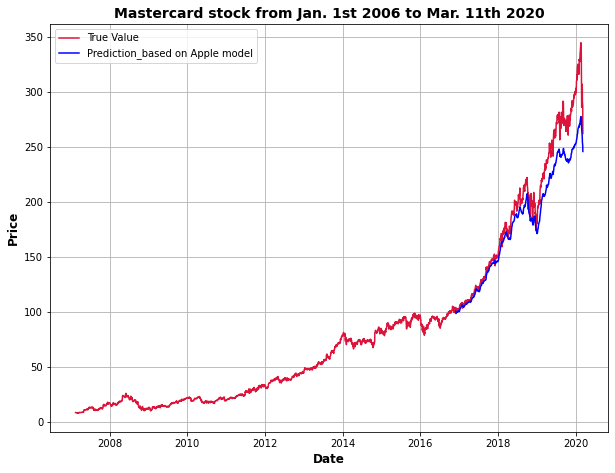

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_lstm['Y_1'],color='#DC143C',label='True Value')
plt.plot(MAST_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('Mastercard stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

476.15518

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    6.674311
dtype: float32

### FORD

In [ ]:
FORD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-03,16.469999,16.910000,16.350000,16.730000,9.747517,8720100
2002-01-04,17.000000,17.150000,16.770000,16.940001,9.869875,7906200
2002-01-07,17.000000,17.049999,16.469999,16.500000,9.613509,6035300
2002-01-08,16.430000,16.740000,16.400000,16.559999,9.648466,4532900
2002-01-09,16.500000,16.830000,16.299999,16.309999,9.502807,7033600


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
FORD_lstm = FORD[['Adj Close', 'Open','High','Low','Close','Volume']]
FORD_lstm.head()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2002-01-03,9.747517,16.469999,16.910000,16.350000,16.730000,8720100
2002-01-04,9.869875,17.000000,17.150000,16.770000,16.940001,7906200
2002-01-07,9.613509,17.000000,17.049999,16.469999,16.500000,6035300
2002-01-08,9.648466,16.430000,16.740000,16.400000,16.559999,4532900
2002-01-09,9.502807,16.500000,16.830000,16.299999,16.309999,7033600


Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  FORD_lstm[op]=FORD_lstm['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
FORD_lstm.tail()

,Adj Close,Open,High,Low,Close,Volume,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,7.08,7.09,7.09,6.92,7.08,70588100,6.97,7.20,6.96,6.97,7.21,7.23,7.57,7.89,8.03,8.00,8.06,8.10,8.25,8.24,8.10,8.06,8.11,8.25,8.31,9.18,8.98,8.82,8.84,8.86,8.820001,8.741339,8.849499,8.987158,9.006823,9.055987,9.006823,9.016656,9.036321,9.134649,...,8.987157,9.141941,9.248356,9.219334,9.170962,8.929112,8.977483,9.006506,9.219334,9.238682,9.287052,9.258030,9.248356,9.993254,9.838470,9.693360,9.722382,9.779572,9.846294,10.017866,9.932080,9.998802,9.712851,9.636596,9.665193,9.722382,9.722382,9.722382,9.646129,9.674723,9.750978,9.722382,9.445961,9.379239,9.484088,9.522215,9.569874,9.569874,9.627065,9.579405
2020-03-05,6.74,6.96,6.97,6.71,6.74,78070900,7.08,6.97,7.20,6.96,6.97,7.21,7.23,7.57,7.89,8.03,8.00,8.06,8.10,8.25,8.24,8.10,8.06,8.11,8.25,8.31,9.18,8.98,8.82,8.84,8.860000,8.820001,8.741339,8.849499,8.987158,9.006823,9.055987,9.006823,9.016656,9.036321,...,8.958136,8.987157,9.141941,9.248356,9.219334,9.170962,8.929112,8.977483,9.006506,9.219334,9.238682,9.287052,9.258030,9.248356,9.993254,9.838470,9.693360,9.722382,9.779572,9.846294,10.017866,9.932080,9.998802,9.712851,9.636596,9.665193,9.722382,9.722382,9.722382,9.646129,9.674723,9.750978,9.722382,9.445961,9.379239,9.484088,9.522215,9.569874,9.569874,9.627065
2020-03-06,6.49,6.60,6.68,6.40,6.49,109932200,6.74,7.08,6.97,7.20,6.96,6.97,7.21,7.23,7.57,7.89,8.03,8.00,8.06,8.10,8.25,8.24,8.10,8.06,8.11,8.25,8.31,9.18,8.98,8.82,8.840000,8.860000,8.820001,8.741339,8.849499,8.987158,9.006823,9.055987,9.006823,9.016656,...,8.706611,8.958136,8.987157,9.141941,9.248356,9.219334,9.170962,8.929112,8.977483,9.006506,9.219334,9.238682,9.287052,9.258030,9.248356,9.993254,9.838470,9.693360,9.722382,9.779572,9.846294,10.017866,9.932080,9.998802,9.712851,9.636596,9.665193,9.722382,9.722382,9.722382,9.646129,9.674723,9.750978,9.722382,9.445961,9.379239,9.484088,9.522215,9.569874,9.569874
2020-03-09,5.90,5.97,6.14,5.87,5.90,103901700,6.49,6.74,7.08,6.97,7.20,6.96,6.97,7.21,7.23,7.57,7.89,8.03,8.00,8.06,8.10,8.25,8.24,8.10,8.06,8.11,8.25,8.31,9.18,8.98,8.820000,8.840000,8.860000,8.820001,8.741339,8.849499,8.987158,9.006823,9.055987,9.006823,...,8.571175,8.706611,8.958136,8.987157,9.141941,9.248356,9.219334,9.170962,8.929112,8.977483,9.006506,9.219334,9.238682,9.287052,9.258030,9.248356,9.993254,9.838470,9.693360,9.722382,9.779572,9.846294,10.017866,9.932080,9.998802,9.712851,9.636596,9.665193,9.722382,9.722382,9.722382,9.646129,9.674723,9.750978,9.722382,9.445961,9.379239,9.484088,9.522215,9.569874
2020-03-10,6.26,6.26,6.29,5.80,6.26,101873600,5.90,6.49,6.74,7.08,6.97,7.20,6.96,6.97,7.21,7.23,7.57,7.89,8.03,8.00,8.06,8.10,8.25,8.24,8.10,8.06,8.11,8.25,8.31,9.18,8.980000,8.820000,8.840000,8.860000,8.820001,8.741339,8.849499,8.987158,9.006823,9.055987,...,8.667914,8.571175,8.706611,8.958136,8.987157,9.141941,9.248356,9.219334,9.170962,8.929112,8.977483,9.006506,9.219334,9.238682,9.287052,9.

drop the unnecceray columns.

In [ ]:
FORD_lstm.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
FORD_lstm.drop(MAST_lstm.index[0:memory_days+p_days],inplace=True)
FORD_lstm.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


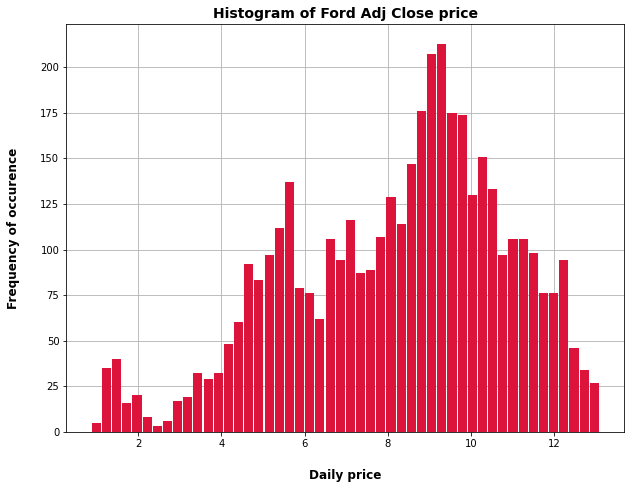

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(FORD_lstm['Adj Close'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of Ford Adj Close price',weight='bold',size=14)
plt.xlabel('Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

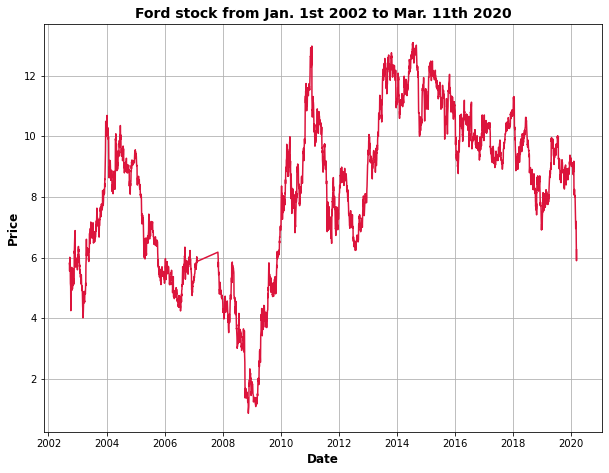

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_lstm['Adj Close'],color='#DC143C')
plt.title('Ford stock from Jan. 1st 2002 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
FORD_lstm.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-20,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,8.012610,7.792515,7.751189,7.438312,...,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517
2002-09-23,5.746235,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,8.012610,7.792515,7.751189,...,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875
2002-09-24,5.555885,5.746235,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,8.012610,7.792515,...,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509
2002-09-25,5.930639,5.555885,5.746235,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,8.012610,...,9.591771,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,

In [ ]:
dataset = FORD_lstm.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4216, 180)

In [ ]:
Y.shape

(4216,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

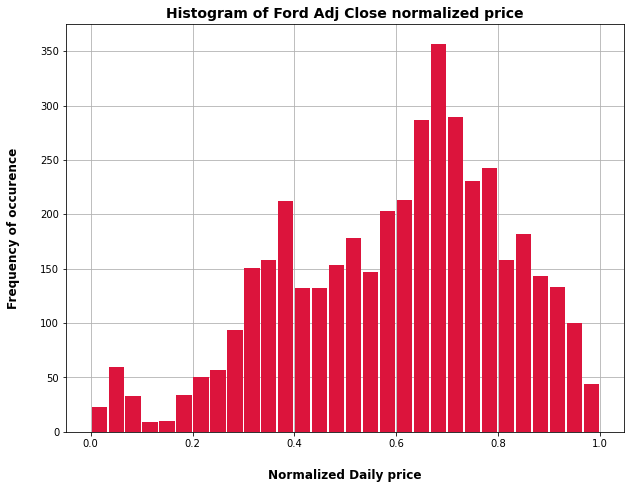

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(Y,bins=30,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of Ford Adj Close normalized price',weight='bold',size=14)
plt.xlabel('Normalized Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4216
3162 1054
3162 1054


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(3162, 1, 180)

#### Training on ford historical data


In [ ]:
#del model_M
model_F = Sequential()
model_F.add(LSTM(128, input_shape=(1, memory_days), return_sequences=True))
#model.add(Dropout(0.50))
model_F.add(LSTM(64, input_shape=(1,  memory_days), return_sequences=False))
#model.add(Dropout(0.50))
model_F.add(Dense(16))
model_F.add(Dense(1))
adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_F.compile(loss='mean_squared_error', optimizer=adam)
model_M.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 128)            158208    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 208,673
Trainable params: 208,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_F.fit(trainX, trainY, validation_split=0.25, epochs=100, batch_size=256, verbose=2);

Epoch 1/100
10/10 - 1s - loss: 0.0797 - val_loss: 0.0035
Epoch 2/100
10/10 - 0s - loss: 0.0177 - val_loss: 0.0733
Epoch 3/100
10/10 - 0s - loss: 0.0138 - val_loss: 0.0133
Epoch 4/100
10/10 - 0s - loss: 0.0115 - val_loss: 0.0379
Epoch 5/100
10/10 - 0s - loss: 0.0091 - val_loss: 0.0133
Epoch 6/100
10/10 - 0s - loss: 0.0067 - val_loss: 0.0116
Epoch 7/100
10/10 - 0s - loss: 0.0045 - val_loss: 0.0077
Epoch 8/100
10/10 - 0s - loss: 0.0033 - val_loss: 0.0031
Epoch 9/100
10/10 - 0s - loss: 0.0030 - val_loss: 0.0038
Epoch 10/100
10/10 - 0s - loss: 0.0027 - val_loss: 0.0066
Epoch 11/100
10/10 - 0s - loss: 0.0024 - val_loss: 0.0057
Epoch 12/100
10/10 - 0s - loss: 0.0021 - val_loss: 0.0042
Epoch 13/100
10/10 - 0s - loss: 0.0018 - val_loss: 0.0033
Epoch 14/100
10/10 - 0s - loss: 0.0017 - val_loss: 0.0025
Epoch 15/100
10/10 - 0s - loss: 0.0015 - val_loss: 0.0042
Epoch 16/100
10/10 - 0s - loss: 0.0014 - val_loss: 0.0013
Epoch 17/100
10/10 - 0s - loss: 0.0013 - val_loss: 0.0029
Epoch 18/100
10/10 - 0s

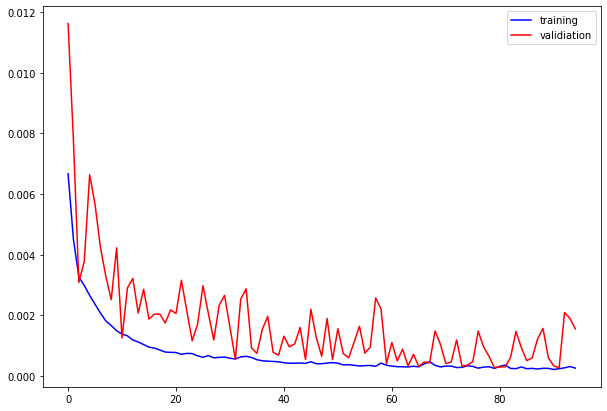

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(model_F.history.history['loss'][5:],'b',label='training')
plt.plot(model_F.history.history['val_loss'][5:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
print(testX.shape)
testPredict = model_F.predict(testX)


(1054, 1, 180)


In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1054, 1)


(1054, 180)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
FORD_lstm.reset_index(inplace=True)
FORD_lstm['Date'] = pd.to_datetime(FORD_lstm['Date'])
FORD_lstm.insert (1, 'Y', Y_n)
FORD_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
FORD_predict=pd.DataFrame(FORD_lstm.tail(len(testPredict_n)))
FORD_predict.drop('Y',inplace=True,axis=1)

In [ ]:
FORD_predict.reset_index(inplace=True)
FORD_predict['Date'] = pd.to_datetime(FORD_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
FORD_predict.insert (1, 'Y', testPredict_n)
FORD_predict.set_index('Date',inplace=True)

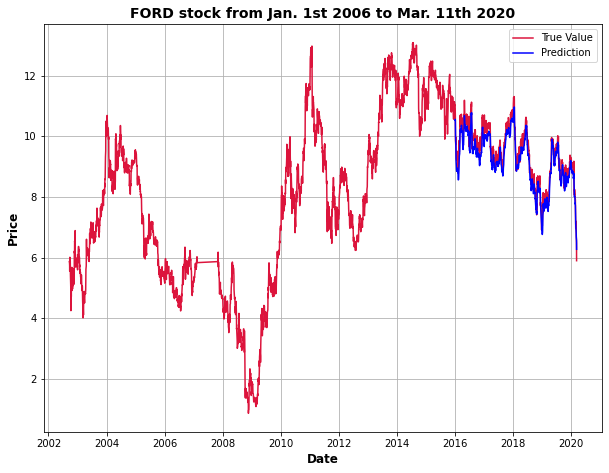

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_lstm['Y'],color='#DC143C',label='True Value')
plt.plot(FORD_predict['Y'],color='b',label='Prediction')
plt.title('FORD stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.078414366

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    2.563964
dtype: float32

#### Using the model trained on Apple data

In [ ]:
# make predictions
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testX.shape)
testPredict = model.predict(testX)


(1054, 1, 180)


In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1054, 1)


(1054, 180)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
FORD_lstm.reset_index(inplace=True)
FORD_lstm['Date'] = pd.to_datetime(FORD_lstm['Date'])
FORD_lstm.insert (1, 'Y_1', Y_n)
FORD_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
FORD_predict=pd.DataFrame(FORD_lstm.tail(len(testPredict_n)))
FORD_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
FORD_predict.reset_index(inplace=True)
FORD_predict['Date'] = pd.to_datetime(FORD_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
FORD_predict.insert (1, 'Y_1', testPredict_n)
FORD_predict.set_index('Date',inplace=True)

In [ ]:
FORD_lstm.head()

,Y_1,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-20,5.871156,5.871156,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,8.012610,7.792515,...,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517
2002-09-23,5.811671,5.811671,5.746235,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,8.012610,...,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875
2002-09-24,5.746235,5.746235,5.555885,5.746235,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,7.762774,...,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509
2002-09-25,5.555885,5.555885,5.930639,5.555885,5.746235,5.811671,5.871156,6.103145,6.228064,6.358929,6.335134,6.477900,6.638509,6.483848,6.424365,6.067454,6.358929,6.573076,6.507641,7.001368,6.918088,6.918088,7.072747,7.185769,7.007315,7.239304,7.138183,7.084647,7.215513,6.775327,6.906191,6.751531,6.805067,6.924036,7.043006,7.090594,7.304740,7.233356,6.995421,7.405863,...,9.591771,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.

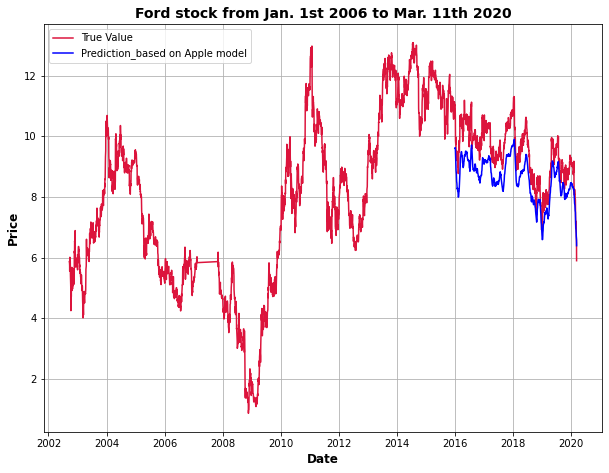

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_lstm['Y_1'],color='#DC143C',label='True Value')
plt.plot(FORD_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('Ford stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.7920985

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    8.684368
dtype: float32

### EXON

In [ ]:
EXON.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-03,39.849998,39.980000,39.410000,39.660000,23.768194,10128200
2002-01-04,39.700001,40.070000,39.599998,40.000000,23.971949,8052100
2002-01-07,39.750000,40.090000,39.490002,39.650002,23.762201,9945700
2002-01-08,39.900002,39.990002,39.500000,39.700001,23.792166,8278000
2002-01-09,39.599998,39.970001,39.099998,39.240002,23.516485,10036700


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
EXON_lstm = EXON[['Adj Close', 'Open','High','Low','Close','Volume']]
EXON_lstm.head()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2002-01-03,23.768194,39.849998,39.980000,39.410000,39.660000,10128200
2002-01-04,23.971949,39.700001,40.070000,39.599998,40.000000,8052100
2002-01-07,23.762201,39.750000,40.090000,39.490002,39.650002,9945700
2002-01-08,23.792166,39.900002,39.990002,39.500000,39.700001,8278000
2002-01-09,23.516485,39.599998,39.970001,39.099998,39.240002,10036700


Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  EXON_lstm[op]=EXON_lstm['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
EXON_lstm.tail()

,Adj Close,Open,High,Low,Close,Volume,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,52.419998,52.230000,52.480000,51.119999,52.419998,24079600,51.299999,53.880001,51.439999,49.820000,53.009998,54.200001,56.360001,59.130001,59.860001,60.340000,59.880001,60.650002,60.930000,61.270000,60.529999,59.959999,60.600002,61.004200,61.842167,59.121231,59.870472,61.240799,63.873013,63.202637,63.734993,63.823715,65.381355,65.824982,66.239044,66.623528,67.589653,67.845970,68.112152,68.220596,...,67.826530,68.157722,69.639412,67.830597,68.273178,67.618927,69.033272,69.716393,71.544441,72.496956,72.487335,71.977409,72.092865,72.506584,72.516205,72.227554,72.150589,72.006271,72.622040,73.055000,74.161453,74.690636,74.632904,74.575180,73.536064,73.584183,73.247421,73.545692,72.852951,73.661140,73.728493,72.949158,73.699631,73.382126,74.036377,74.748360,73.709251,72.468094,72.872192,72.246803
2020-03-05,50.110001,50.419998,50.700001,49.040001,50.110001,40788200,52.419998,51.299999,53.880001,51.439999,49.820000,53.009998,54.200001,56.360001,59.130001,59.860001,60.340000,59.880001,60.650002,60.930000,61.270000,60.529999,59.959999,60.600002,61.004200,61.842167,59.121231,59.870472,61.240799,63.873013,63.202637,63.734993,63.823715,65.381355,65.824982,66.239044,66.623528,67.589653,67.845970,68.112152,...,68.664253,67.826530,68.157722,69.639412,67.830597,68.273178,67.618927,69.033272,69.716393,71.544441,72.496956,72.487335,71.977409,72.092865,72.506584,72.516205,72.227554,72.150589,72.006271,72.622040,73.055000,74.161453,74.690636,74.632904,74.575180,73.536064,73.584183,73.247421,73.545692,72.852951,73.661140,73.728493,72.949158,73.699631,73.382126,74.036377,74.748360,73.709251,72.468094,72.872192
2020-03-06,47.689999,48.840000,49.009998,47.200001,47.689999,55640500,50.110001,52.419998,51.299999,53.880001,51.439999,49.820000,53.009998,54.200001,56.360001,59.130001,59.860001,60.340000,59.880001,60.650002,60.930000,61.270000,60.529999,59.959999,60.600002,61.004200,61.842167,59.121231,59.870472,61.240799,63.873013,63.202637,63.734993,63.823715,65.381355,65.824982,66.239044,66.623528,67.589653,67.845970,...,65.897820,68.664253,67.826530,68.157722,69.639412,67.830597,68.273178,67.618927,69.033272,69.716393,71.544441,72.496956,72.487335,71.977409,72.092865,72.506584,72.516205,72.227554,72.150589,72.006271,72.622040,73.055000,74.161453,74.690636,74.632904,74.575180,73.536064,73.584183,73.247421,73.545692,72.852951,73.661140,73.728493,72.949158,73.699631,73.382126,74.036377,74.748360,73.709251,72.468094
2020-03-09,41.860001,41.709999,44.570000,40.799999,41.860001,72896300,47.689999,50.110001,52.419998,51.299999,53.880001,51.439999,49.820000,53.009998,54.200001,56.360001,59.130001,59.860001,60.340000,59.880001,60.650002,60.930000,61.270000,60.529999,59.959999,60.600002,61.004200,61.842167,59.121231,59.870472,61.240799,63.873013,63.202637,63.734993,63.823715,65.381355,65.824982,66.239044,66.623528,67.589653,...,65.508179,65.897820,68.

drop the unnecceray columns.

In [ ]:
EXON_lstm.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
EXON_lstm.drop(MAST_lstm.index[0:memory_days+p_days],inplace=True)
EXON_lstm.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


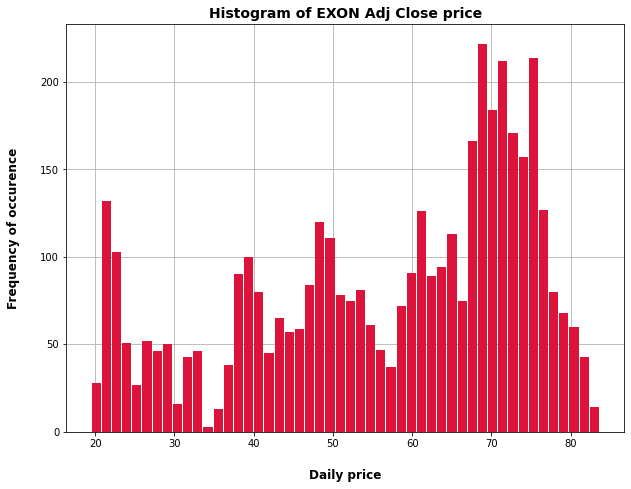

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(EXON_lstm['Adj Close'],bins=50,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of EXON Adj Close price',weight='bold',size=14)
plt.xlabel('Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

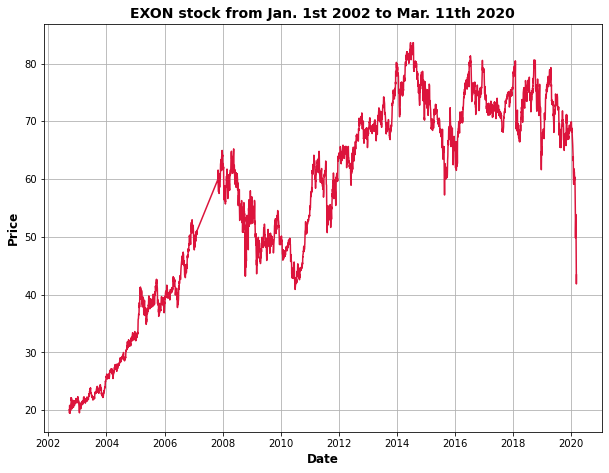

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_lstm['Adj Close'],color='#DC143C')
plt.title('EXON stock from Jan. 1st 2002 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
EXON_lstm.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-20,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.403593,22.289316,21.628399,22.028599,21.276720,...,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194
2002-09-23,19.967251,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.403593,22.289316,21.628399,22.028599,...,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949
2002-09-24,19.497362,19.967251,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.403593,22.289316,21.628399,...,25.621624,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201
2002-09-25,19.900118,19.497362,19.967251,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.40

In [ ]:
dataset = EXON_lstm.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4216, 180)

In [ ]:
Y.shape

(4216,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

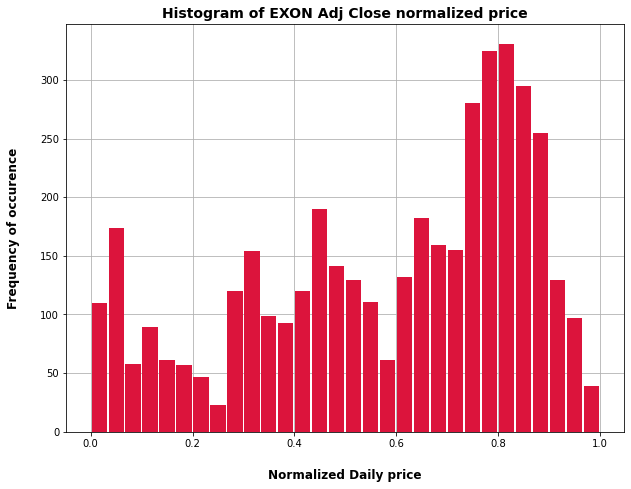

In [ ]:
plt.figure(figsize=(10,7.5))
plt.hist(Y,bins=30,color='#DC143C',rwidth=0.9,zorder=2)
plt.title('Histogram of EXON Adj Close normalized price',weight='bold',size=14)
plt.xlabel('Normalized Daily price',labelpad=20,weight='bold',size=12)
plt.ylabel('Frequency of occurence',labelpad=20,weight='bold',size=12)
plt.grid(True)

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4216
3162 1054
3162 1054


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

(3162, 1, 180)

#### Training on Exon historical data


In [ ]:
#del model_M
model_E = Sequential()
model_E.add(LSTM(128, input_shape=(1, memory_days), return_sequences=True))
#model.add(Dropout(0.50))
model_E.add(LSTM(64, input_shape=(1,  memory_days), return_sequences=False))
#model.add(Dropout(0.50))
model_E.add(Dense(16))
model_E.add(Dense(1))
adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_E.compile(loss='mean_squared_error', optimizer=adam)
model_E.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 128)            158208    
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 208,673
Trainable params: 208,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_E.fit(trainX, trainY, validation_split=0.25, epochs=100, batch_size=256, verbose=2);

Epoch 1/100
10/10 - 1s - loss: 0.0486 - val_loss: 0.0113
Epoch 2/100
10/10 - 0s - loss: 0.0098 - val_loss: 0.0315
Epoch 3/100
10/10 - 0s - loss: 0.0061 - val_loss: 0.0174
Epoch 4/100
10/10 - 0s - loss: 0.0048 - val_loss: 0.0157
Epoch 5/100
10/10 - 0s - loss: 0.0037 - val_loss: 0.0117
Epoch 6/100
10/10 - 0s - loss: 0.0032 - val_loss: 0.0071
Epoch 7/100
10/10 - 0s - loss: 0.0028 - val_loss: 0.0058
Epoch 8/100
10/10 - 0s - loss: 0.0026 - val_loss: 0.0053
Epoch 9/100
10/10 - 0s - loss: 0.0024 - val_loss: 0.0038
Epoch 10/100
10/10 - 0s - loss: 0.0022 - val_loss: 0.0046
Epoch 11/100
10/10 - 0s - loss: 0.0019 - val_loss: 0.0037
Epoch 12/100
10/10 - 0s - loss: 0.0016 - val_loss: 0.0042
Epoch 13/100
10/10 - 0s - loss: 0.0014 - val_loss: 0.0036
Epoch 14/100
10/10 - 0s - loss: 0.0012 - val_loss: 0.0027
Epoch 15/100
10/10 - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 16/100
10/10 - 0s - loss: 0.0011 - val_loss: 0.0022
Epoch 17/100
10/10 - 0s - loss: 0.0010 - val_loss: 0.0027
Epoch 18/100
10/10 - 0s

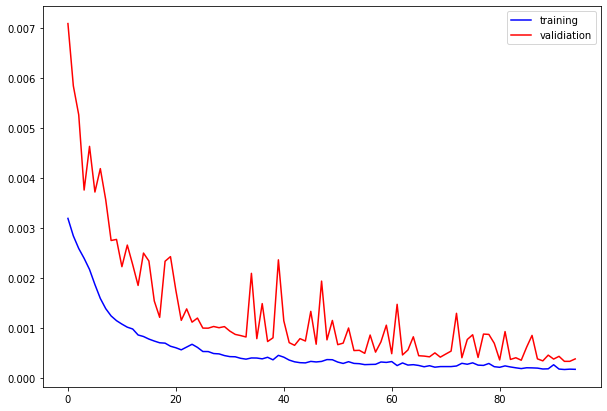

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(model_E.history.history['loss'][5:],'b',label='training')
plt.plot(model_E.history.history['val_loss'][5:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
print(testX.shape)
testPredict = model_E.predict(testX)


(1054, 1, 180)


In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1054, 1)


(1054, 180)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
EXON_lstm.reset_index(inplace=True)
EXON_lstm['Date'] = pd.to_datetime(EXON_lstm['Date'])
EXON_lstm.insert (1, 'Y', Y_n)
EXON_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
EXON_predict=pd.DataFrame(EXON_lstm.tail(len(testPredict_n)))
EXON_predict.drop('Y',inplace=True,axis=1)

In [ ]:
EXON_predict.reset_index(inplace=True)
EXON_predict['Date'] = pd.to_datetime(EXON_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
EXON_predict.insert (1, 'Y', testPredict_n)
EXON_predict.set_index('Date',inplace=True)

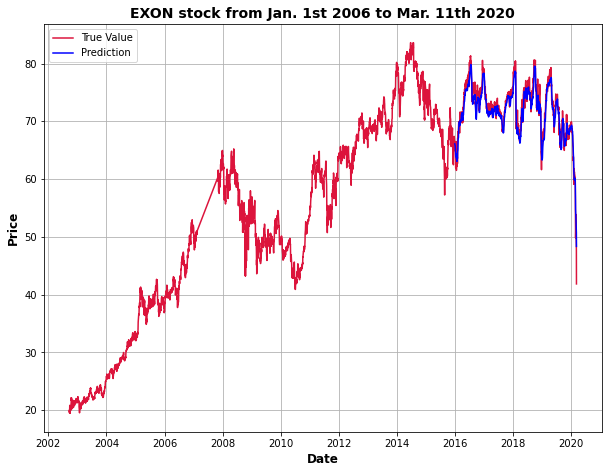

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_lstm['Y'],color='#DC143C',label='True Value')
plt.plot(EXON_predict['Y'],color='b',label='Prediction')
plt.title('EXON stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

1.5332972

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    1.342903
dtype: float32

#### Using the model trained on Apple data

In [ ]:
# make predictions
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testX.shape)
testPredict = model.predict(testX)


(1054, 1, 180)


In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1054, 1)


(1054, 180)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
EXON_lstm.reset_index(inplace=True)
EXON_lstm['Date'] = pd.to_datetime(EXON_lstm['Date'])
EXON_lstm.insert (1, 'Y_1', Y_n)
EXON_lstm.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
EXON_predict=pd.DataFrame(EXON_lstm.tail(len(testPredict_n)))
EXON_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
EXON_predict.reset_index(inplace=True)
EXON_predict['Date'] = pd.to_datetime(EXON_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
EXON_predict.insert (1, 'Y_1', testPredict_n)
EXON_predict.set_index('Date',inplace=True)

In [ ]:
EXON_lstm.head()

,Y_1,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,...,Adj Close_141,Adj Close_142,Adj Close_143,Adj Close_144,Adj Close_145,Adj Close_146,Adj Close_147,Adj Close_148,Adj Close_149,Adj Close_150,Adj Close_151,Adj Close_152,Adj Close_153,Adj Close_154,Adj Close_155,Adj Close_156,Adj Close_157,Adj Close_158,Adj Close_159,Adj Close_160,Adj Close_161,Adj Close_162,Adj Close_163,Adj Close_164,Adj Close_165,Adj Close_166,Adj Close_167,Adj Close_168,Adj Close_169,Adj Close_170,Adj Close_171,Adj Close_172,Adj Close_173,Adj Close_174,Adj Close_175,Adj Close_176,Adj Close_177,Adj Close_178,Adj Close_179,Adj Close_180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-09-20,19.747566,19.747566,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.403593,22.289316,21.628399,...,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194
2002-09-23,20.058784,20.058784,19.967251,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.403593,22.289316,...,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949
2002-09-24,19.967251,19.967251,19.497362,19.967251,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,20.403593,...,25.621624,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201
2002-09-25,19.497362,19.497362,19.900118,19.497362,19.967251,20.058784,19.747566,20.260168,20.180838,20.992466,20.797182,20.498163,21.114508,21.230455,20.748363,20.937542,20.608011,20.638521,20.516468,21.633226,21.596605,21.736967,22.518070,22.377724,22.060390,22.597416,22.237366,22.078701,22.676739,22.487568,22.664534,22.206854,21.260975,21.804085,22.029869,21.828497,20.797709,20.251993,19.706285,20.379330,...,2

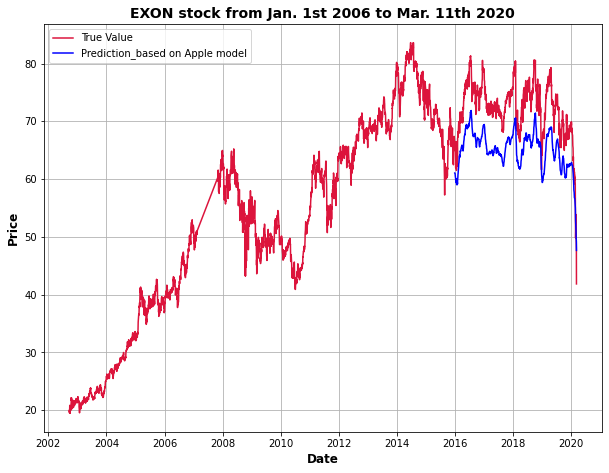

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_lstm['Y_1'],color='#DC143C',label='True Value')
plt.plot(EXON_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('EXON stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

53.331245

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    9.715082
dtype: float32